# Digit recognizer using Tensorflow and Keras(Neural Network)

In [79]:
#Modeules

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
print(tf.__version__)

2.3.1


In [64]:
#dataset

dataset = tf.keras.datasets.mnist
(x_train,y_train)  ,(x_test,y_test) = dataset.load_data()

In [65]:
#shape of data

(x_train.shape,x_test.shape)

((60000, 28, 28), (10000, 28, 28))

Total counts of digit labels in train data: 


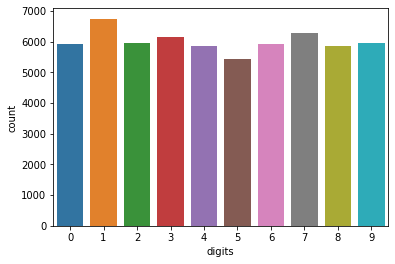

Total counts of digit labels in test data: 


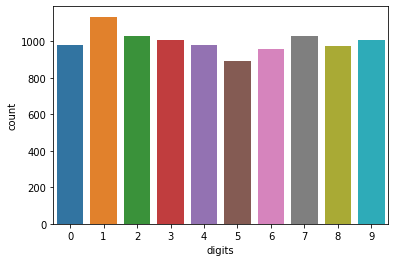

In [86]:
print("Total counts of digit labels in train data: ")
sns.countplot(y_train)
plt.xlabel("digits")
plt.show()


print("Total counts of digit labels in test data: ")
sns.countplot(y_test)
plt.xlabel("digits")
plt.show()

[]

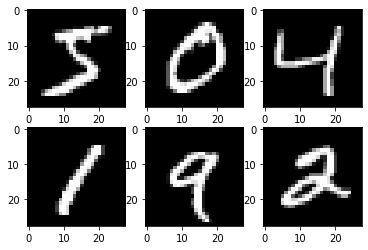

In [68]:
#images in train data

fig, axs = plt.subplots(2,3)
axs[0,0].imshow(x_train[0],cmap="gray")
axs[0,1].imshow(x_train[1],cmap="gray")
axs[0,2].imshow(x_train[2],cmap="gray")
axs[1,0].imshow(x_train[3],cmap="gray")
axs[1,1].imshow(x_train[4],cmap="gray")
axs[1,2].imshow(x_train[5],cmap="gray")
plt.plot()

In [24]:
#pixels in range between 0 to 1
x_train = x_train/255
x_test = x_test/255

### building the model

In [27]:
#model building

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [28]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
#training model

model.fit(x=x_train, y=y_train, epochs=10,batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 14ms/step - loss: 0.3641 - accuracy: 0.8982
Epoch 2/10
300/300 [==============================] - 4s 15ms/step - loss: 0.1391 - accuracy: 0.9587
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0952 - accuracy: 0.9712
Epoch 4/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0710 - accuracy: 0.9791
Epoch 5/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0574 - accuracy: 0.9825
Epoch 6/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0455 - accuracy: 0.9860
Epoch 7/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0377 - accuracy: 0.9886
Epoch 8/10
300/300 [==============================] - 4s 15ms/step - loss: 0.0307 - accuracy: 0.9909
Epoch 9/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 10/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0199 - accura

In [36]:
#Accuracy for training datasets
train_loss,train_acc = model.evaluate(x=x_train, y=y_train)
print("train accuracy for the model is : {}%".format(train_acc*100))

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0184 - accuracy: 0.9946
train accuracy for the model is : 99.45833086967468%


In [35]:
#Accuracy for test data
test_loss,test_acc = model.evaluate(x=x_test, y=y_test)
print("test accuracy for the model is : {}%".format(test_acc*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0857 - accuracy: 0.9763
test accuracy for the model is : 97.63000011444092%
0.08573220670223236


#### Check the predictions

In [50]:
#predicting values

pred = model.predict([x_test])

#### Predicted digit

In [51]:
#model predicted values

print(np.argmax(pred[100]))
print(np.argmax(pred[101]))
print(np.argmax(pred[104]))
print(np.argmax(pred[110]))
print(np.argmax(pred[135]))
print(np.argmax(pred[200]))

6
0
5
8
1
3


#### Real Digit

[]

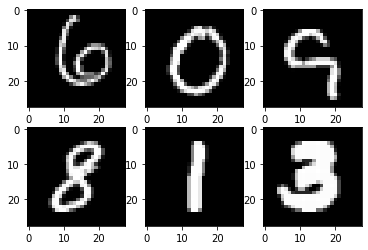

In [52]:
#actual values  in test data

fig, axs = plt.subplots(2,3)
axs[0,0].imshow(x_test[100],cmap="gray")
axs[0,1].imshow(x_test[101],cmap="gray")
axs[0,2].imshow(x_test[104],cmap="gray")
axs[1,0].imshow(x_test[110],cmap="gray")
axs[1,1].imshow(x_test[135],cmap="gray")
axs[1,2].imshow(x_test[200],cmap="gray")
plt.plot()

## Plotting graphs

In [99]:

history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),epochs=20,batch_size=200)

Epoch 1/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1651 - accuracy: 0.9953 - val_loss: 2.7920 - val_accuracy: 0.9762
Epoch 2/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1869 - accuracy: 0.9950 - val_loss: 2.8521 - val_accuracy: 0.9730
Epoch 3/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1735 - accuracy: 0.9948 - val_loss: 2.8855 - val_accuracy: 0.9735
Epoch 4/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1777 - accuracy: 0.9953 - val_loss: 3.2368 - val_accuracy: 0.9733
Epoch 5/20
300/300 [==============================] - 5s 17ms/step - loss: 0.1828 - accuracy: 0.9948 - val_loss: 3.1685 - val_accuracy: 0.9716
Epoch 6/20
300/300 [==============================] - 5s 17ms/step - loss: 0.2410 - accuracy: 0.9939 - val_loss: 3.1419 - val_accuracy: 0.9721
Epoch 7/20
300/300 [==============================] - 5s 18ms/step - loss: 0.1895 - accuracy: 0.9948 - val_loss: 2.5316 - val_accuracy: 0.9765

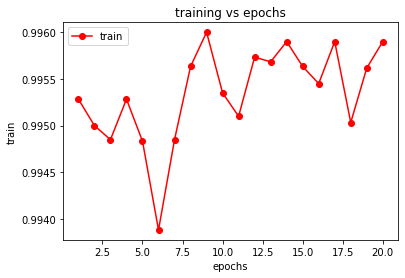

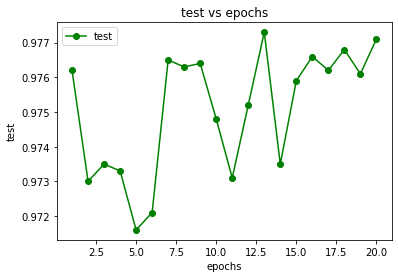

In [108]:
#Accuracy

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,marker='o',color='r',label='train')
plt.title("training vs epochs")
plt.xlabel("epochs")
plt.ylabel("train")
plt.legend()
plt.show()

plt.plot(epochs,val_acc,marker='o',color='g',label='test')
plt.title("test vs epochs")
plt.xlabel("epochs")
plt.ylabel("test")
plt.legend()
plt.show()


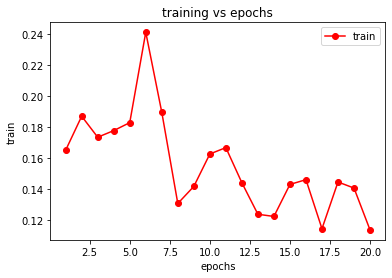

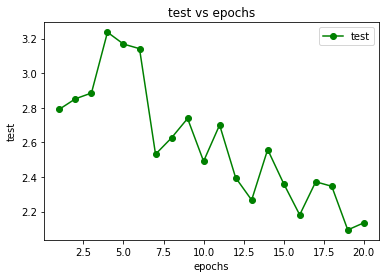

In [109]:
#losses

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(train_loss)+1)

plt.plot(epochs,train_loss,marker='o',color='r',label='train')
plt.title("training vs epochs")
plt.xlabel("epochs")
plt.ylabel("train")
plt.legend()
plt.show()

plt.plot(epochs,val_loss,marker='o',color='g',label='test')
plt.title("test vs epochs")
plt.xlabel("epochs")
plt.ylabel("test")
plt.legend()
plt.show()


#### Confusion matrix

In [115]:
#Confusion matrics

from sklearn.metrics import confusion_matrix, classification_report
Y_pred = np.argmax(pred,axis=1)
confusion_matrix(y_test,Y_pred)

array([[ 970,    0,    1,    1,    0,    0,    1,    1,    5,    1],
       [   0, 1121,    3,    1,    0,    1,    3,    0,    6,    0],
       [   3,    0, 1007,    2,    1,    0,    2,    2,   15,    0],
       [   0,    0,    9,  981,    1,    6,    0,    1,    9,    3],
       [   2,    0,    4,    0,  944,    0,    7,    1,    8,   16],
       [   2,    0,    0,    7,    1,  871,    2,    1,    5,    3],
       [   4,    2,    1,    1,    5,    5,  937,    0,    3,    0],
       [   1,    5,   12,    2,    1,    0,    1,  989,    8,    9],
       [   1,    0,    3,    3,    0,    2,    1,    1,  960,    3],
       [   3,    2,    0,    4,    2,    4,    1,    4,    6,  983]])

In [119]:
# precision and recall

print(classification_report(y_test,Y_pred,target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.94      0.99      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Used Library :
`tensorflow` `numpy` `matplotlib` `seaborn`

In [ ]:
S